# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


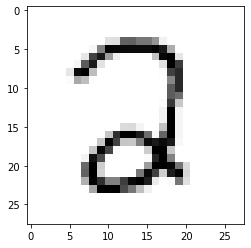

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.21599198181733423
train accuracy is: 0.8060423969287264, test accuracy is 0.8069556451612904


Epoch 10 Loss 0.06536574247786238
train accuracy is: 0.9359038557836755, test accuracy is 0.9480846774193549


Epoch 20 Loss 0.046459402022932306
train accuracy is: 0.9504256384576866, test accuracy is 0.9601814516129032


Epoch 30 Loss 0.038849418052019746
train accuracy is: 0.957102320146887, test accuracy is 0.9662298387096774


Epoch 40 Loss 0.034473246944400175
train accuracy is: 0.9616925388082124, test accuracy is 0.9692540322580645


Epoch 50 Loss 0.03152181132718627
train accuracy is: 0.9640293773994325, test accuracy is 0.9722782258064516


Epoch 60 Loss 0.02933623634832488
train accuracy is: 0.9670338841595727, test accuracy is 0.9727822580645161


Epoch 70 Loss 0.02760986217001188
train accuracy is: 0.9682023034551828, test accuracy is 0.9737903225806451


Epoch 80 Loss 0.026195774191761174
train accuracy is: 0.970372225004173, test accuracy is 0.9747983870967742


Epoch 90 Loss 0.024985356948454135
train accuracy is: 0.971373727257553, test accuracy is 0.9747983870967742


Epoch 100 Loss 0.023930860175758066
train accuracy is: 0.9729594391587381, test accuracy is 0.9753024193548387


Epoch 110 Loss 0.022982852612217743
train accuracy is: 0.9742113169754631, test accuracy is 0.9758064516129032


Epoch 120 Loss 0.022139588133481308
train accuracy is: 0.9757135703555333, test accuracy is 0.9747983870967742


Epoch 130 Loss 0.021373031733474226
train accuracy is: 0.9765481555666834, test accuracy is 0.9758064516129032


Epoch 140 Loss 0.020673291710328102
train accuracy is: 0.9772158237356035, test accuracy is 0.9773185483870968


Epoch 150 Loss 0.020024929563736606
train accuracy is: 0.9778834919045235, test accuracy is 0.9778225806451613


Epoch 160 Loss 0.01942526209765111
train accuracy is: 0.9786346185945585, test accuracy is 0.9783266129032258


Epoch 170 Loss 0.01886463673515088
train accuracy is: 0.9795526623268236, test accuracy is 0.9783266129032258


Epoch 180 Loss 0.018341069435607794
train accuracy is: 0.9802203304957436, test accuracy is 0.9783266129032258


Epoch 190 Loss 0.01784778101349436
train accuracy is: 0.9808879986646637, test accuracy is 0.9783266129032258


Epoch 200 Loss 0.01738033229053428
train accuracy is: 0.9816391253546987, test accuracy is 0.9788306451612904


Epoch 210 Loss 0.01694002967025099
train accuracy is: 0.9821398764813888, test accuracy is 0.9783266129032258


Epoch 220 Loss 0.01651846075178568
train accuracy is: 0.9823067935236187, test accuracy is 0.9788306451612904


Epoch 230 Loss 0.016116789236534937
train accuracy is: 0.9828075446503088, test accuracy is 0.9788306451612904


Epoch 240 Loss 0.015730731901042887
train accuracy is: 0.9833917542981139, test accuracy is 0.9798387096774194


0.03233563041285087

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.273766740231873
train accuracy is: 0.5358871640794525, test accuracy is 0.5604838709677419


Epoch 10 Loss 0.10699569211910488
train accuracy is: 0.9055249540978134, test accuracy is 0.9092741935483871


Epoch 20 Loss 0.08135168325377727
train accuracy is: 0.9249707895176097, test accuracy is 0.9344758064516129


Epoch 30 Loss 0.06962686400982661
train accuracy is: 0.9331497245868803, test accuracy is 0.9430443548387096


Epoch 40 Loss 0.0626061166533724
train accuracy is: 0.9391587381071608, test accuracy is 0.9511088709677419


Epoch 50 Loss 0.05784894459812998
train accuracy is: 0.9441662493740611, test accuracy is 0.954133064516129


Epoch 60 Loss 0.054372859119865065
train accuracy is: 0.9473376731764314, test accuracy is 0.9561491935483871


Epoch 70 Loss 0.051699743678003285
train accuracy is: 0.9496745117676515, test accuracy is 0.9566532258064516


Epoch 80 Loss 0.04956580631129307
train accuracy is: 0.9510098481054916, test accuracy is 0.9616935483870968


Epoch 90 Loss 0.04781602795061038
train accuracy is: 0.9520113503588716, test accuracy is 0.9637096774193549


Epoch 100 Loss 0.04634631966252076
train accuracy is: 0.9532632281755967, test accuracy is 0.9637096774193549


Epoch 110 Loss 0.045088798503215836
train accuracy is: 0.9540978133867468, test accuracy is 0.9652217741935484


Epoch 120 Loss 0.04399844024606177
train accuracy is: 0.9547654815556669, test accuracy is 0.9647177419354839


Epoch 130 Loss 0.04303966369358356
train accuracy is: 0.9554331497245869, test accuracy is 0.9657258064516129


Epoch 140 Loss 0.042188713813882305
train accuracy is: 0.956017359372392, test accuracy is 0.9672379032258065


Epoch 150 Loss 0.04142663901135256
train accuracy is: 0.957269237189117, test accuracy is 0.967741935483871


Epoch 160 Loss 0.04073860617154301
train accuracy is: 0.9578534468369221, test accuracy is 0.967741935483871


Epoch 170 Loss 0.040113789233025395
train accuracy is: 0.9582707394424971, test accuracy is 0.967741935483871


Epoch 180 Loss 0.03954298436117724
train accuracy is: 0.958604573526957, test accuracy is 0.9682459677419355


Epoch 190 Loss 0.03901677571309358
train accuracy is: 0.9591053246536472, test accuracy is 0.9682459677419355


Epoch 200 Loss 0.03853225696981298
train accuracy is: 0.9593557002169921, test accuracy is 0.9682459677419355


Epoch 210 Loss 0.038081992326285
train accuracy is: 0.9595226172592222, test accuracy is 0.967741935483871


Epoch 220 Loss 0.037663400452942926
train accuracy is: 0.9596895343014522, test accuracy is 0.9682459677419355


Epoch 230 Loss 0.037272800413932654
train accuracy is: 0.9598564513436821, test accuracy is 0.9682459677419355


Epoch 240 Loss 0.03690656416148292
train accuracy is: 0.9603572024703723, test accuracy is 0.9692540322580645


0.03651909784631922

### Comparing results of NN and LR

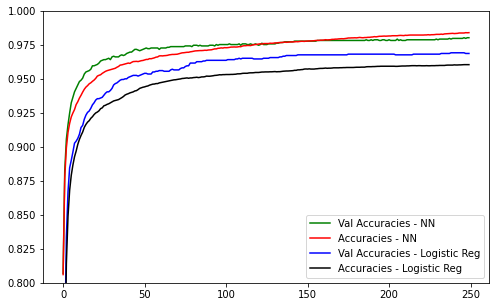

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

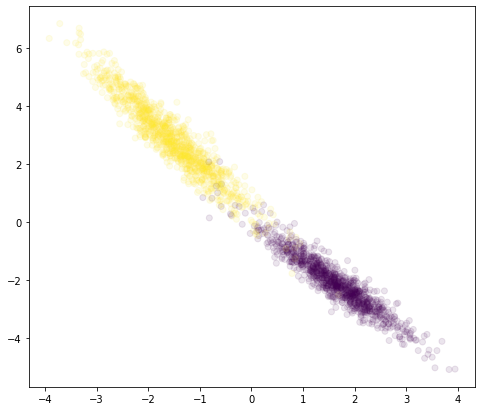

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

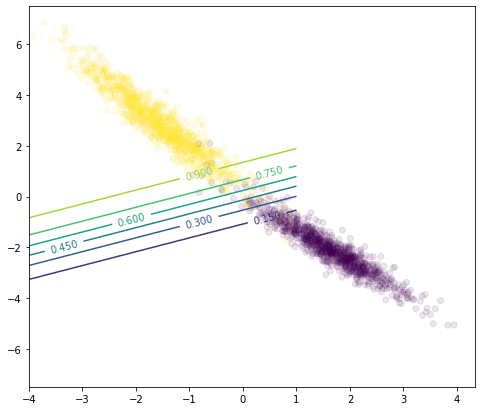

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );